# GRIP Task 1 : Prediction using Supervised ML 

**We have to predict the percentage of a student based on the number of study hours**

**Importing the required Datasets and Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("The data has been imported")
df.head()

The data has been imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

Plotting the data in order to get a clear idea about the relation of the **number of hours studied** and the **scores obtained** 

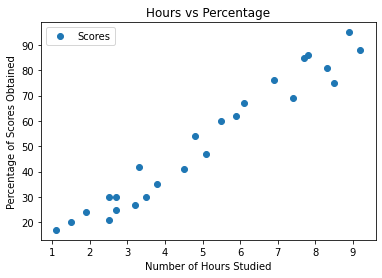

In [6]:
df.plot(x = 'Hours', y = 'Scores' , style = 'o')
plt.xlabel('Number of Hours Studied')
plt.ylabel('Percentage of Scores Obtained')
plt.title('Hours vs Percentage')
plt.show()

**From the scatter plot it has been observed that there is a clear positive linear relation between the Number of Hours Studied and the Percentage of Scores Obtained**

{'whiskers': [<matplotlib.lines.Line2D at 0x12a4399ddf0>,
 'caps': [<matplotlib.lines.Line2D at 0x12a439b2550>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a4399da60>,
 'medians': [<matplotlib.lines.Line2D at 0x12a439b2c70>,
 'fliers': [<matplotlib.lines.Line2D at 0x12a439bc040>,
 'means': []}

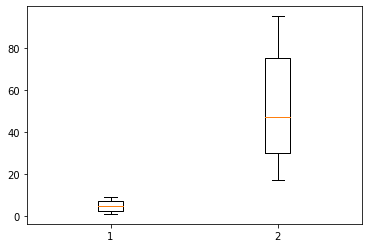

In [8]:
plt.boxplot(df)

# Linear Regression

**Now we separate the train and test data**

In [9]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, test_size = 0.2, random_state = 42)

# Model Training

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [11]:
print(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


# Prediction

In [15]:
y_pred = lm.predict(X_test)
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


# Comparison of Actual and Predicted Values

In [19]:
df1 = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})
df1.head()

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


# Plotting the Regression Line

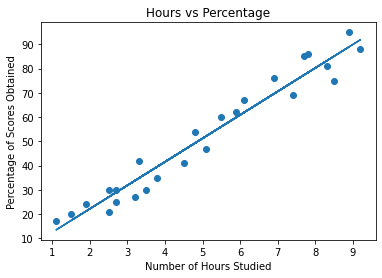

In [23]:
regression_line = lm.coef_*X + lm.intercept_
plt.scatter(X,Y)
plt.plot(X,regression_line)
plt.title('Hours vs Percentage')
plt.xlabel('Number of Hours Studied')
plt.ylabel('Percentage of Scores Obtained')
plt.show()

In [24]:
print('Test Score')
print(lm.score(X_test,Y_test))
print('Train Score')
print(lm.score(X_train, Y_train))

Test Score
0.9678055545167994
Train Score
0.9491209376364416


# Prediction of the Score of a Student who Studies 9.25 hrs/day

In [25]:
result = lm.predict([[9.25]])
print('Score of the Student who studies 9.25 hrs/day ', result)

Score of the Student who studies 9.25 hrs/day  [92.38611528]


# Evaluating Model

In [27]:
from sklearn import metrics
print('Mean Absolute Error is ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error is ' , metrics.mean_squared_error(Y_test, y_pred))

Mean Absolute Error is  3.9207511902099244
Mean Squared Error is  18.943211722315272
